In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

my_dataframe = pd.read_csv('Advertising.csv') 
feature_cols = ['TV', 'Radio', 'Newspaper']
X = my_dataframe[feature_cols].values
y = my_dataframe.Sales.values

Xtrain = X[:140]
ytrain = y[:140]

Xtest = X[140:]
ytest = y[140:]
from sklearn.linear_model import LinearRegression

my_model = LinearRegression()

#fit the model using our data
my_model.fit(Xtrain, ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2]:
ypredicts = my_model.predict(Xtest)

print ("The predicted sales:")
print (ypredicts)
print ()
print ("The true sales:")
print (ytest)

The predicted sales:
[ 9.5143544  18.29202877 19.27094064  8.88723582 10.11361706  9.96041972
 15.62706788 23.1587013  12.03845031  9.72212471 18.63809455 10.10099867
 16.48589616 18.12468609 15.64364266  5.30523275 15.12744231 10.25358725
 10.09006252 12.44362791 14.3210309  13.3616908  15.08443331 17.32769433
 11.18435749 14.4341081  10.57847377 13.65085298 17.24682604 18.30648623
  7.42659652 14.39756088  7.52782982 12.20541805 14.08031808 24.73378746
 20.09744782 12.3485591  16.40555117 12.5803357  10.85519521 14.21321462
  6.62420582 24.08691176 18.72317811 20.7349155   9.90581943 17.13834561
 18.98753788  6.02878648 12.27110367  8.5198605   4.49610391 18.42872767
 16.46701074  5.46575208  8.33322951 13.02457489 23.73586521 15.48426632]

The true sales:
[10.9 19.2 20.1 10.4 11.4 10.3 13.2 25.4 10.9 10.1 16.1 11.6 16.6 19.
 15.6  3.2 15.3 10.1  7.3 12.9 14.4 13.3 14.9 18.  11.9 11.9  8.  12.2
 17.1 15.   8.4 14.5  7.6 11.7 11.5 27.  20.2 11.7 11.8 12.6 10.5 12.2
  8.7 26.2 17.6 22.

In [3]:
mse = np.mean((ypredicts - ytest) ** 2)

print ("MSE: {}".format(mse))

print (my_model.intercept_)
print (my_model.coef_)

zipped_list =  (zip(feature_cols, my_model.coef_))
print(list(zipped_list))

MSE: 2.557965925460623
3.0451422090371203
[ 0.04704868  0.17968299 -0.00300557]
[('TV', 0.047048680822289274), ('Radio', 0.17968298889993567), ('Newspaper', -0.0030055651568067047)]


In [4]:
def getErrorwithSize(model, train_sizes, Xtrain, ytrain, Xtest, ytest):
    
    # Initialize needed variables   
    model_mse   = np.zeros(len(train_sizes))  # storing model accuracy
    model_wts   = np.zeros([len(train_sizes), 4]) # storing model weights
    
    #Train our model with increasing data for each iteration
    for size in train_sizes:    
        Xsubtrain = Xtrain[0:size,:]
        ysubtrain = ytrain[0:size]
        model.fit(Xsubtrain, ysubtrain)
    
        # Test our model on fixed test set
        ypredicts = model.predict(Xtest)    
        
        index              = (size//10)-1        
        model_mse[index]  = np.mean((ypredicts - ytest)**2)
        model_wts[index,:] = np.append(model.intercept_, model.coef_)  
    
    return model_mse, model_wts

[ 10  20  30  40  50  60  70  80  90 100 110 120 130 140]


Text(0.5, 1.0, 'Effect of Data size on prediction error')

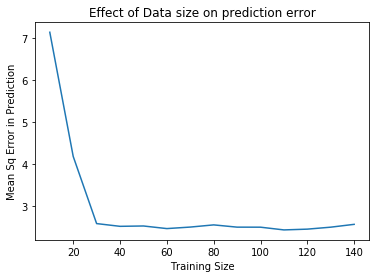

In [5]:
train_sizes = np.arange(10,150,10) # training size from 10 to 140
mse,weights = getErrorwithSize(my_model,train_sizes, Xtrain, ytrain, Xtest, ytest)
print (train_sizes)

#Plot the accuracy with training size
plt.plot(train_sizes, mse)
plt.xlabel('Training Size')
plt.ylabel('Mean Sq Error in Prediction')
plt.title('Effect of Data size on prediction error')



In [6]:
# First, lets re-create the data matrix with features X and response y
data = np.c_[X,y]
print (data.shape)
data[0:5,:]

# create a random subsample of training and testing data 

from sklearn.model_selection import train_test_split

Dtrain, Dtest = train_test_split(data, test_size=0.3)

print(data.shape)
print(Dtrain.shape)
print(Dtest.shape)

(200, 4)
(200, 4)
(140, 4)
(60, 4)


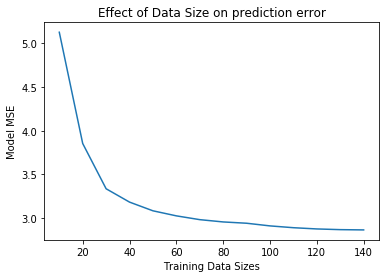

In [7]:
trials = 100

train_sizes = np.arange(10,150,10) # training size from 10 to 140
final_mse       = np.zeros(len(train_sizes))  # storing model prediction error
final_model_wts = np.zeros([len(train_sizes), 4]) # storing model weights

for i in range(0,trials):
    Dtrain, Dtest = train_test_split(data, test_size=0.3)
    Xtrain = Dtrain[:, 0:3]
    ytrain = Dtrain[:,3]

    Xtest = Dtest[:, 0:3]
    ytest = Dtest[:,3]
    
    mse,weights = getErrorwithSize(my_model, train_sizes,Xtrain, ytrain, Xtest, ytest)
    
    final_mse  +=  mse # final_mse = final_mse + mse 
    
final_mse       /= trials # final_mse = final_mse / trials

#Plot the final MSE
plt.plot(train_sizes, final_mse)

plt.xlabel('Training Data Sizes')
plt.ylabel('Model MSE')
plt.title('Effect of Data Size on prediction error')
plt.show()